关于auotgluon安装参考[官方教程](https://auto.gluon.ai/stable/install.html):
* Python3.9安装比较试用
* 安装试用CPU版本即可，GPU版本很容易出现安装以来错误

In [38]:
%matplotlib inline

import numpy as np
import warnings
import matplotlib.pyplot as plt

warnings.filterwarnings('ignore')
np.random.seed(123)

## 导入数据

In [45]:
df = pd.read_excel('data.xlsx')
df.head()

,Unnamed: 0,sample,1st_component_atom_number,1st_component_element_fraction,2nd_component_atom_number,2nd_component_element_fraction,3rd_component_atom_number,3rd_component_element_fraction,morphology,phase,PH,electrode,potential,tafel,ref
0,1,α-Ni(OH)2,28,0.971,74,0.029,0,0.000,2,2,13.6,1,237,33,1
1,2,α-Ni(OH)2,28,0.971,74,0.029,0,0.000,1,2,13.6,1,264,58,1
2,3,α-Ni(OH)2,28,0.750,26,0.125,23,0.125,1,2,13.6,3,200,39,2
3,4,Co-Fe-LDH\n(Co:Fe =\n2:1 原料比),27,0.664,26,0.332,44,0.004,1,1,13.6,3,198,39,3
4,5,Co-Fe-LDH(Co:Fe =\n2:1原料比),27,0.666,26,0.334,0,0.000,1,1,13.6,3,310,59,3


## 数据预处理

In [46]:
# 删除冗余数据
col_drop = [0,1,13,14]
data = df.drop(df.columns[col_drop], axis=1, inplace=False)  # axis=1表示列，inplace改变原数据
data.head()

,1st_component_atom_number,1st_component_element_fraction,2nd_component_atom_number,2nd_component_element_fraction,3rd_component_atom_number,3rd_component_element_fraction,morphology,phase,PH,electrode,potential
0,28,0.971,74,0.029,0,0.000,2,2,13.6,1,237
1,28,0.971,74,0.029,0,0.000,1,2,13.6,1,264
2,28,0.750,26,0.125,23,0.125,1,2,13.6,3,200
3,27,0.664,26,0.332,44,0.004,1,1,13.6,3,198
4,27,0.666,26,0.334,0,0.000,1,1,13.6,3,310


In [55]:
# 划分测试集、训练集
train_data = data.sample(frac=0.9, random_state=0, axis=0)
test_data = data[~data.index.isin(train_data.index)]
train_data.head()

,1st_component_atom_number,1st_component_element_fraction,2nd_component_atom_number,2nd_component_element_fraction,3rd_component_atom_number,3rd_component_element_fraction,morphology,phase,PH,electrode,potential
2,28,0.750,26,0.125,23,0.125,1,2,13.6,3,200
13,23,0.748,28,0.187,44,0.065,1,1,13.6,2,190
53,28,0.611,26,0.204,13,0.185,1,1,13.6,2,300
41,28,0.818,26,0.091,0,0.000,5,1,13.6,1,215
66,15,0.600,27,0.200,25,0.200,6,0,13.6,4,288


## 预测值统计信息

In [56]:
predict_label = 'potential'
print("Summary of potential variable: \n", train_data[predict_label].describe())

Summary of potential variable: 
 count     79.000000
mean     279.632911
std       61.447117
min      170.000000
25%      230.500000
50%      280.000000
75%      324.000000
max      420.000000
Name: potential, dtype: float64


## 模型训练

In [61]:
save_path = "Models-predictPotenial" # 模型数据保存路径
metric = 'root_mean_squared_error'
# 这里可以适当增加time_limit限制使模型更优
predictor_potential = TabularPredictor(label=predict_label, path=save_path,  
    eval_metric=metric).fit(train_data, time_limit=6000, presets='best_quality')
performance = predictor_potential.evaluate(test_data) # 测试集上的表现

Presets specified: ['best_quality']
Beginning AutoGluon training ... Time limit = 6000s
AutoGluon will save models to "Models-predictPotenial\"
AutoGluon Version:  0.4.0
Python Version:     3.9.12
Operating System:   Windows
Train Data Rows:    79
Train Data Columns: 10
Label Column: potential
Preprocessing data ...
AutoGluon infers your prediction problem is: 'regression' (because dtype of label-column == int and many unique label-values observed).
	Label info (max, min, mean, stddev): (420, 170, 279.63291, 61.44712)
	If 'regression' is not the correct problem_type, please manually specify the problem_type parameter during predictor init (You may specify problem_type as one of: ['binary', 'multiclass', 'regression'])
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    39792.01 MB
	Train Data (Original)  Memory Usage: 0.01 MB (0.0% of available memory)
	Inferring data type of each feature based on column va

## 所有模型评估

In [62]:
predictor_potential.leaderboard(test_data, silent=True)

,model,score_test,score_val,pred_time_test,pred_time_val,fit_time,pred_time_test_marginal,pred_time_val_marginal,fit_time_marginal,stack_level,can_infer,fit_order
0,LightGBMLarge_BAG_L1,-43.602109,-51.652781,0.266287,0.180213,16.212236,0.266287,0.180213,16.212236,1,True,11
1,RandomForestMSE_BAG_L1,-44.136912,-56.715501,0.032912,0.076795,0.286236,0.032912,0.076795,0.286236,1,True,5
2,ExtraTreesMSE_BAG_L1,-47.387792,-57.954051,0.033910,0.061835,0.261300,0.033910,0.061835,0.261300,1,True,7
3,CatBoost_BAG_L1,-48.914593,-52.691248,0.131649,0.107713,168.370224,0.131649,0.107713,168.370224,1,True,6
4,WeightedEnsemble_L2,-51.144806,-50.548749,1.572763,1.534011,49.970617,0.001995,0.000996,0.240358,2,True,12
5,NeuralNetFastAI_BAG_L1,-51.861717,-52.213515,0.961458,0.996899,45.956858,0.961458,0.996899,45.956858,1,True,8
6,NeuralNetTorch_BAG_L1,-55.447134,-52.033472,0.792851,0.915302,26.936728,0.792851,0.915302,26.936728,1,True,10
7,LightGBM_BAG_L1,-55.640586,-54.511437,0.352058,0.174144,16.765019,0.352058,0.174144,16.765019,1,True,4
8,LightGBMXT_BAG_L1,-56.888135,-55.549796,0.410901,0.189519,17.862467,0.410901,0.189519,17.862467,1,True,3
9,XGBoost_BAG_L1,-58.479451,-52.919305,0.511630,0.437500,6.581295,0.511630,0.437500,6.581295,1,True,9


## 测试集表现

In [63]:
# 这里模型会自动选择评分最好的模型来预测
y_train_pred = predictor_potential.predict(train_data)
y_test_pred = predictor_potential.predict(test_data)
y_test_pred

9     274.931244
21    290.973938
36    270.953827
44    297.779602
47    302.659729
64    273.732178
67    273.712372
70    281.636047
84    328.934631
Name: potential, dtype: float32

## 可视化

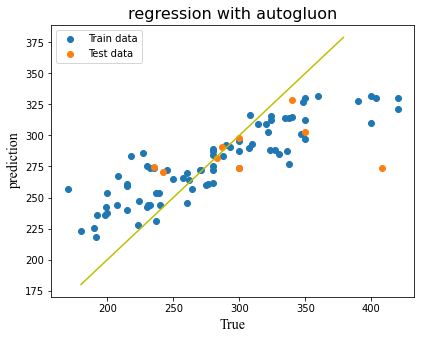

In [68]:
%matplotlib inline

fig = plt.figure(figsize=(6.5,5))
plt.scatter(train_data['potential'], y_train_pred)
plt.scatter(test_data['potential'], y_test_pred)
plt.plot(np.arange(180,380), np.arange(180,380), 'y-')

plt.title('regression with autogluon',fontsize=16)
plt.ylabel('prediction', fontdict={'family':'Times New Roman', 'size': 14})
plt.xlabel('True', fontdict={'family':'Times New Roman', 'size': 14})
plt.legend(labels=['Train data','Test data'])